 Q2
 
 This problem focuses on the collinearity problem.

(a) Perform the following commands in Python:

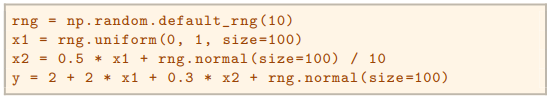

rng = np.random.default_rng(10)

x1 = rng.uniform(0, 1, size=100)

x2 = 0.5 * x1 + rng.normal(size=100) / 10

y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefcients?


In [4]:
import numpy as np
import statsmodels.api as sm

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

c:\Users\sabri\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The form of the linear model is: y = β0 + β1x1 + β2x2 + ϵ

The regression coefficients are:

- Intercept = 2
- Coefficient of x1 = 2
- Coefficient of x2 = 0.3

(b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

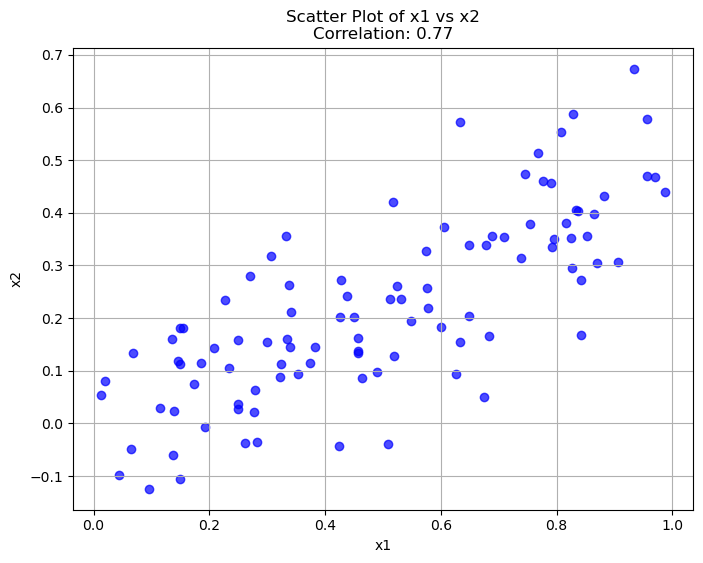

In [5]:
import matplotlib.pyplot as plt

# Reproduce the data generation process
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10

# Calculate correlation between x1 and x2
correlation = np.corrcoef(x1, x2)[0, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, color='blue', alpha=0.7)
plt.title(f'Scatter Plot of x1 vs x2\nCorrelation: {correlation:.2f}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()


The correlation between x1 and x2 is approximately 0.77, indicating a strong positive relationship. The scatter plot above visually shows this relationship, where x2 tends to increase as x1 increases. ​​

(c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and
βˆ2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?

In [6]:
# Combine x1 and x2 into a matrix for the regression
X = np.column_stack((x1, x2))

# Add a constant (intercept term) to the independent variables
X_with_constant = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
ols_model = sm.OLS(y, X_with_constant).fit()

# Get the summary of the regression, which includes p-values
ols_summary = ols_model.summary()

# Display the summary to see the p-values for β1 and β2
print(ols_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        22:27:03   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

The least squares regression is： 

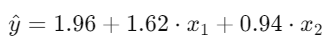

where
- βˆ0 = 1.96
- βˆ1 = 1.62
- βˆ2 = 0.94

Comparison with the true coefficients:
- True β0 = 2 and estimated β^0 is 1.96. The estimate is very close to the true intercept.
- True β1 = 2 and estimated β^1 is 1.62. The estimate is somewhat lower to the true value.
- True β2 = 0.3 and estimated β^2 is 0.94. The estimate is higher than the true value, likely due to collinearity between x1 and x2.

Hypothesis Testing:
- The p-value for β^1 is 0.003, which is much less than 0.05. Therefore, we reject the null hypothesis 𝐻0 : 𝛽1 = 0, indicating that x1 is a significant predictor of y. 
- The p-value for β^2 is 0.259, which is greater than 0.05. Therefore, we we fail to reject the null hypothesis 𝐻0 : 𝛽2 = 0, indicating that x2 is not a statistically significant predictor of y at the 5% significance level.

(d) Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

In [8]:
from sklearn.linear_model import LinearRegression  # Import the required class

# Fit the least squares regression using only x1
X_x1_only = x1.reshape(-1, 1)  # Reshape to 2D for the regression model
model_x1_only = LinearRegression()
model_x1_only.fit(X_x1_only, y)

# Get the coefficient and intercept for the model with only x1
beta0_x1_only = model_x1_only.intercept_
beta1_x1_only = model_x1_only.coef_[0]

# Fit using statsmodels for hypothesis testing
X_x1_only_with_constant = sm.add_constant(X_x1_only)  # Adds the intercept term
ols_model_x1_only = sm.OLS(y, X_x1_only_with_constant).fit()

# Get the summary of the OLS results, including p-values for hypothesis testing
ols_summary_x1_only = ols_model_x1_only.summary()

# Display the summary to examine p-values for hypothesis testing
print(ols_summary_x1_only)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        22:39:50   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

The least squares regression model for predicting y using only x1 is：
- y^ = 1.94 + 2.08 * x1
​
Hypothesis Testing:
- For H0：β1 = 0：The p-value  for β ^1 is 0.000, which is far less than 0.05. Therefore, we reject the null hypothesis.


(e) Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

In [9]:

# Fit the least squares regression using only x2
X_x2_only = x2.reshape(-1, 1)  # Reshape to 2D for the regression model
model_x2_only = LinearRegression()
model_x2_only.fit(X_x2_only, y)

# Get the coefficient and intercept for the model with only x2
beta0_x2_only = model_x2_only.intercept_
beta1_x2_only = model_x2_only.coef_[0]

# Fit using statsmodels for hypothesis testing
X_x2_only_with_constant = sm.add_constant(X_x2_only)  # Adds the intercept term
ols_model_x2_only = sm.OLS(y, X_x2_only_with_constant).fit()

# Get the summary of the OLS results, including p-values for hypothesis testing
ols_summary_x2_only = ols_model_x2_only.summary()

# Print the coefficients and OLS summary
print(f"Intercept (β0): {beta0_x2_only}")
print(f"Coefficient for x2 (β1): {beta1_x2_only}")
print("\nOLS Summary for regression using only x2:")
print(ols_summary_x2_only)

Intercept (β0): 2.3238900124979285
Coefficient for x2 (β1): 2.910323231032977

OLS Summary for regression using only x2:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        22:42:51   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

The least squares regression model for predicting y using only x2 is：
- y^ = 2.32 + 2.91 * x2

Hypothesis Testing:
- For H0：β1 = 0：The p-value  for β ^1 is 0.000, which is far less than 0.05. Therefore, we reject the null hypothesis.


(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.

- The results from parts (c)–(e) do not necessarily contradict each other but rather provide insights into how each predictor (x1 and x2) behaves when considered individually or together in the model.
- The results show that x1 is the stronger predictor, but x2 does have predictive power when used alone. The apparent "contradiction" arises due to the correlation between x1 and x2 , which impacts the results of the regression when both are included in the model.

(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to np.concatenate this additional observation to each of x1, x2 and y.
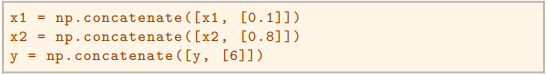

x1 = np.concatenate([x1, [0.1]])

x2 = np.concatenate([x2, [0.8]])

y = np.concatenate([y, [6]])

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [10]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Reproduce the data generation process and add the new observation
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Add the mismeasured observation
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

# Fit the least squares regression using both x1 and x2
X_new = np.column_stack((x1_new, x2_new))
model_new_both = LinearRegression()
model_new_both.fit(X_new, y_new)
beta0_new_both, beta1_new_both, beta2_new_both = model_new_both.intercept_, model_new_both.coef_[0], model_new_both.coef_[1]

# Fit the least squares regression using only x1
X_x1_only_new = x1_new.reshape(-1, 1)
model_x1_only_new = LinearRegression()
model_x1_only_new.fit(X_x1_only_new, y_new)
beta0_x1_only_new, beta1_x1_only_new = model_x1_only_new.intercept_, model_x1_only_new.coef_[0]

# Fit the least squares regression using only x2
X_x2_only_new = x2_new.reshape(-1, 1)
model_x2_only_new = LinearRegression()
model_x2_only_new.fit(X_x2_only_new, y_new)
beta0_x2_only_new, beta1_x2_only_new = model_x2_only_new.intercept_, model_x2_only_new.coef_[0]

# Perform leverage and outlier analysis using statsmodels
X_new_with_constant = sm.add_constant(X_new)
ols_model_new = sm.OLS(y_new, X_new_with_constant).fit()
influence = ols_model_new.get_influence()
leverage = influence.hat_matrix_diag
studentized_residuals = influence.resid_studentized_external

# Check the leverage and residual for the new point
last_point_leverage = leverage[-1]
last_point_student_residual = studentized_residuals[-1]

# Print the updated regression coefficients and leverage analysis
print(f"Model using both x1 and x2:")
print(f"Intercept (β0): {beta0_new_both}")
print(f"Coefficient for x1 (β1): {beta1_new_both}")
print(f"Coefficient for x2 (β2): {beta2_new_both}\n")

print(f"Model using only x1:")
print(f"Intercept (β0): {beta0_x1_only_new}")
print(f"Coefficient for x1 (β1): {beta1_x1_only_new}\n")

print(f"Model using only x2:")
print(f"Intercept (β0): {beta0_x2_only_new}")
print(f"Coefficient for x2 (β1): {beta1_x2_only_new}\n")

# Output for the leverage and residual of the new point
print(f"Leverage of new point: {last_point_leverage}")
print(f"Studentized residual of new point: {last_point_student_residual}")


Model using both x1 and x2:
Intercept (β0): 2.0617912597584573
Coefficient for x1 (β1): 0.8575448183694916
Coefficient for x2 (β2): 2.2663234876910465

Model using only x1:
Intercept (β0): 2.073940502406075
Coefficient for x1 (β1): 1.8760456383662107

Model using only x2:
Intercept (β0): 2.2840118640185634
Coefficient for x2 (β1): 3.145848627575483

Leverage of new point: 0.34767161961426657
Studentized residual of new point: 2.7837306228248013


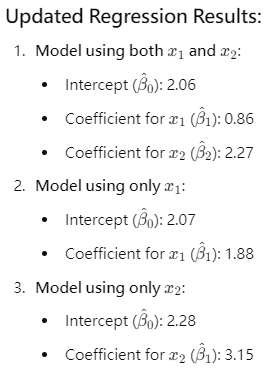

In all models, the new observation has caused a noticeable change in the coefficients.

Outlier and High-Leverage Point Analysis:
- Leverage of the new point: 0.35 (relatively high but not extreme).
- Studentized residual: 2.78 (indicating the new point is an outlier because the residual is greater than 2, which is a common threshold for identifying outliers).

Conclusion:
- Outlier: Yes, the new observation is an outlier, as its studentized residual is greater than 2.
- High-Leverage Point: While the leverage (0.35) is higher than average, it is not extremely high. Typically, leverage values above 0.5 are considered high, but in this case, it's moderately high.

The new observation is both an outlier and has some influence due to its moderate leverage, significantly affecting the model's coefficients